<a href="https://colab.research.google.com/github/gulabpatel/PySpark/blob/main/SQL_toPandas_LogisticRegression_CV_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##We have to load libraries before we start our analysis. 
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 55kB/s 
     |████████████████████████████████| 204kB 23.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=c0baf7d18b152680f89b6704063e98ce46d00ee45bb17baf52fc15b863b5d87b
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
from pyspark.sql.types import *
from pyspark.sql import Row
#from pyspark.sql import SparkSession, SQLContext
from pyspark import SparkContext
from pyspark import SQLContext

In [ ]:
sc = SparkContext()

In [ ]:
spark = SQLContext(sc)

In [ ]:
#File location type
file_location = "/content/Churn.csv"
file_type = "csv"

#CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type) \
     .option("inferSchema", infer_schema) \
     .option("header", first_row_is_header) \
     .option("sep", delimiter) \
     .option("nanValue", ' ') \
     .option("nullValue", ' ') \
     .load(file_location)

In [ ]:
df.show()

+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+--------------------+---------------+-------------+-----------+
|Gender|Senior_Citizen|Partner|Dependents|Tenure_Months|Phone_Service|  Multiple_Lines|Internet_Service|    Online_Security|      Online_Backup|  Device_Protection|       Tech_Support|       Streaming_TV|   Streaming_Movies|      Contract|Paperless_Billing|      Payment_Method|Monthly_Charges|Total_Charges|Churn_Label|
+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+--------------------+---------------+-------------+-----------+
|  Male|            No|     No|      

In [ ]:
df.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Senior_Citizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure_Months: integer (nullable = true)
 |-- Phone_Service: string (nullable = true)
 |-- Multiple_Lines: string (nullable = true)
 |-- Internet_Service: string (nullable = true)
 |-- Online_Security: string (nullable = true)
 |-- Online_Backup: string (nullable = true)
 |-- Device_Protection: string (nullable = true)
 |-- Tech_Support: string (nullable = true)
 |-- Streaming_TV: string (nullable = true)
 |-- Streaming_Movies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- Paperless_Billing: string (nullable = true)
 |-- Payment_Method: string (nullable = true)
 |-- Monthly_Charges: double (nullable = true)
 |-- Total_Charges: double (nullable = true)
 |-- Churn_Label: string (nullable = true)



In [ ]:
#Check null values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------+-----------------+--------------+---------------+-------------+-----------+
|Gender|Senior_Citizen|Partner|Dependents|Tenure_Months|Phone_Service|Multiple_Lines|Internet_Service|Online_Security|Online_Backup|Device_Protection|Tech_Support|Streaming_TV|Streaming_Movies|Contract|Paperless_Billing|Payment_Method|Monthly_Charges|Total_Charges|Churn_Label|
+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------+-----------------+--------------+---------------+-------------+-----------+
|     0|             0|      0|         0|            0|            0|             0|               0|              0|            0|                0|           0|   

In [ ]:
#We can also convert df to pandas dataframe
pd_df = df.toPandas()

In [ ]:
pd_df.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label'],
      dtype='object')

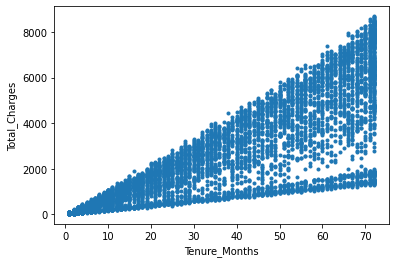

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['Tenure_Months'], pd_df['Total_Charges'],'.')
plt.xlabel('Tenure_Months')
plt.ylabel('Total_Charges')
display()

In [ ]:
#create a view or table, this is ony for this session, one can easily perform the sql on this table
temp = "churn_analysis"
df.createOrReplaceTempView('temp')

In [ ]:
#sql
spark.sql("select * from temp").show()

+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+--------------------+---------------+-------------+-----------+
|Gender|Senior_Citizen|Partner|Dependents|Tenure_Months|Phone_Service|  Multiple_Lines|Internet_Service|    Online_Security|      Online_Backup|  Device_Protection|       Tech_Support|       Streaming_TV|   Streaming_Movies|      Contract|Paperless_Billing|      Payment_Method|Monthly_Charges|Total_Charges|Churn_Label|
+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+--------------------+---------------+-------------+-----------+
|  Male|            No|     No|      

In [ ]:
df.groupBy('Churn_Label').count().show()

+-----------+-----+
|Churn_Label|count|
+-----------+-----+
|         No| 5174|
|        Yes| 1869|
+-----------+-----+



In [ ]:
#pyspark
df.select("Tenure_Months", "Total_Charges", "Monthly_Charges").describe().show()

+-------+------------------+------------------+------------------+
|summary|     Tenure_Months|     Total_Charges|   Monthly_Charges|
+-------+------------------+------------------+------------------+
|  count|              7043|              7032|              7043|
|   mean| 32.37114865824223|2283.3004408418697|  64.7616924605991|
| stddev|24.559481023094488| 2266.771361883143|30.090047097678507|
|    min|                 0|              18.8|             18.25|
|    max|                72|            8684.8|            118.75|
+-------+------------------+------------------+------------------+



In [ ]:
#sql
spark.sql("SELECT Gender, Churn_Label, COUNT(*) from temp GROUP BY Gender, Churn_Label").show()

+------+-----------+--------+
|Gender|Churn_Label|count(1)|
+------+-----------+--------+
|  Male|         No|    2625|
|  Male|        Yes|     930|
|Female|         No|    2549|
|Female|        Yes|     939|
+------+-----------+--------+



In [ ]:
#sql
spark.sql("SELECT Senior_Citizen, Churn_Label, COUNT(*) from temp GROUP BY Senior_Citizen, Churn_Label").show()

+--------------+-----------+--------+
|Senior_Citizen|Churn_Label|count(1)|
+--------------+-----------+--------+
|           Yes|        Yes|     476|
|            No|         No|    4508|
|           Yes|         No|     666|
|            No|        Yes|    1393|
+--------------+-----------+--------+



In [ ]:
#sql
spark.sql("SELECT CAST(Tenure_Months as int), Churn_Label, COUNT(Churn_Label) from temp GROUP BY Tenure_Months, Churn_Label ORDER BY CAST(Tenure_Months as int)").show()

+-------------+-----------+------------------+
|Tenure_Months|Churn_Label|count(Churn_Label)|
+-------------+-----------+------------------+
|            0|         No|                11|
|            1|         No|               233|
|            1|        Yes|               380|
|            2|         No|               115|
|            2|        Yes|               123|
|            3|         No|               106|
|            3|        Yes|                94|
|            4|        Yes|                83|
|            4|         No|                93|
|            5|        Yes|                64|
|            5|         No|                69|
|            6|        Yes|                40|
|            6|         No|                70|
|            7|        Yes|                51|
|            7|         No|                80|
|            8|         No|                81|
|            8|        Yes|                42|
|            9|        Yes|                46|
|            

In [ ]:
#pyspark
df.stat.crosstab("Senior_Citizen","Internet_Service").show()

+-------------------------------+----+-----------+----+
|Senior_Citizen_Internet_Service| DSL|Fiber optic|  No|
+-------------------------------+----+-----------+----+
|                             No|2162|       2265|1474|
|                            Yes| 259|        831|  52|
+-------------------------------+----+-----------+----+



In [ ]:
df.stat.freqItems(["Phone_Service","Multiple_Lines","Internet_Service","Online_Security","Online_Backup","Device_Protection",
"Tech_Support","Streaming_TV","Streaming_Movies"],0.6).collect()

[Row(Phone_Service_freqItems=['Yes'], Multiple_Lines_freqItems=['No'], Internet_Service_freqItems=['Fiber optic'], Online_Security_freqItems=['No'], Online_Backup_freqItems=['Yes'], Device_Protection_freqItems=['Yes'], Tech_Support_freqItems=['No'], Streaming_TV_freqItems=['Yes'], Streaming_Movies_freqItems=['Yes'])]

In [ ]:
#sql
spark.sql("SELECT Paperless_Billing, Churn_Label, COUNT(*) from temp GROUP BY Paperless_Billing, Churn_Label").show()

+-----------------+-----------+--------+
|Paperless_Billing|Churn_Label|count(1)|
+-----------------+-----------+--------+
|              Yes|        Yes|    1400|
|               No|         No|    2403|
|              Yes|         No|    2771|
|               No|        Yes|     469|
+-----------------+-----------+--------+



In [ ]:
#sql
spark.sql("SELECT Payment_Method, Churn_Label, COUNT(*) from temp GROUP BY Payment_Method, Churn_Label").show()

+--------------------+-----------+--------+
|      Payment_Method|Churn_Label|count(1)|
+--------------------+-----------+--------+
|Credit card (auto...|         No|    1290|
|Bank transfer (au...|         No|    1286|
|        Mailed check|        Yes|     308|
|Credit card (auto...|        Yes|     232|
|    Electronic check|         No|    1294|
|    Electronic check|        Yes|    1071|
|Bank transfer (au...|        Yes|     258|
|        Mailed check|         No|    1304|
+--------------------+-----------+--------+



We have done our analysis.
Now, we will do our model building process.... 

In [ ]:
churn_df = df
(train_data, test_data) = churn_df.randomSplit([0.7,0.3], 24)
print("Records for training:" + str(train_data.count()))
print("Records for testing:" + str(test_data.count()))

Records for training:4942
Records for testing:2101


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, OneH StringIndexer, VectorAssembler

In [ ]:
catColumns = ["Gender","Senior_Citizen","Partner","Dependents","Phone_Service","Multiple_Lines","Internet_Service","Online_Security","Online_Backup",
              "Device_Protection","Tech_Support","Streaming_TV","Streaming_Movies","Contract","Paperless_Billing","Payment_Method"]

In [ ]:
#Convert categorical column into Integer
stages = []
for catCol in catColumns:
  stringIndexer = StringIndexer(inputCol=catCol, outputCol=catCol + "Index")
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[catCol+"catVec"])
  stages += [stringIndexer, encoder]

In [ ]:
stages

[StringIndexer_bbbfa0d0065a,
 OneHotEncoder_c82ccfb60ec0,
 StringIndexer_23411e1b9b44,
 OneHotEncoder_717fbe70cc72,
 StringIndexer_9b0d000ff248,
 OneHotEncoder_60c61b748c2a,
 StringIndexer_2fa17e13ed92,
 OneHotEncoder_f0373a1ae4fc,
 StringIndexer_caa32a0a124a,
 OneHotEncoder_5d3fde675714,
 StringIndexer_78c09a8ae988,
 OneHotEncoder_dd09973b679f,
 StringIndexer_e444cc2081d0,
 OneHotEncoder_0fd65c3983d2,
 StringIndexer_21f5843508c2,
 OneHotEncoder_3f1399217bd4,
 StringIndexer_3e16f2c39dcc,
 OneHotEncoder_2407abb64894,
 StringIndexer_bf62735ecd51,
 OneHotEncoder_3d1193639340,
 StringIndexer_092c10e51bbb,
 OneHotEncoder_10ff1b4234a6,
 StringIndexer_c077d2cebaeb,
 OneHotEncoder_1373875bf9d0,
 StringIndexer_2cc217dc5034,
 OneHotEncoder_1e266aec2550,
 StringIndexer_1e0c2f931e1d,
 OneHotEncoder_927c95ced49a,
 StringIndexer_4839fc803ab0,
 OneHotEncoder_d4cda22748b6,
 StringIndexer_ece01afbb88c,
 OneHotEncoder_c726702c220e]

In [ ]:
#Handle missing values
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["Total_Charges"], outputCols=["Out_Total_Charges"])
stages += [imputer]

In [ ]:
label_Idx = StringIndexer(inputCol="Churn_Label", outputCol="label")
stages += [label_Idx]

In [ ]:
temp = label_Idx.fit(train_data).transform(train_data)

In [ ]:
temp.show()

+------+--------------+-------+----------+-------------+-------------+----------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+--------------------+---------------+-------------+-----------+-----+
|Gender|Senior_Citizen|Partner|Dependents|Tenure_Months|Phone_Service|  Multiple_Lines|Internet_Service|Online_Security|Online_Backup|Device_Protection|Tech_Support|Streaming_TV|Streaming_Movies|      Contract|Paperless_Billing|      Payment_Method|Monthly_Charges|Total_Charges|Churn_Label|label|
+------+--------------+-------+----------+-------------+-------------+----------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+--------------------+---------------+-------------+-----------+-----+
|Female|            No|     No|        No|            1|           No|No phone service|             DSL|  

In [ ]:
df.stat.corr('Total_Charges','Monthly_Charges')

0.6511738315787847

In [ ]:
#sql
spark.sql("SELECT CAST(Tenure_Months as int), Churn_Label, COUNT(*) AS churned FROM temp WHERE Churn_Label='Yes' GROUP BY Tenure_Months, Churn_Label ORDER BY CAST(Tenure_Months as int)").show()

+-------------+-----------+-------+
|Tenure_Months|Churn_Label|churned|
+-------------+-----------+-------+
|            1|        Yes|    380|
|            2|        Yes|    123|
|            3|        Yes|     94|
|            4|        Yes|     83|
|            5|        Yes|     64|
|            6|        Yes|     40|
|            7|        Yes|     51|
|            8|        Yes|     42|
|            9|        Yes|     46|
|           10|        Yes|     45|
|           11|        Yes|     31|
|           12|        Yes|     38|
|           13|        Yes|     38|
|           14|        Yes|     24|
|           15|        Yes|     37|
|           16|        Yes|     28|
|           17|        Yes|     26|
|           18|        Yes|     24|
|           19|        Yes|     19|
|           20|        Yes|     18|
+-------------+-----------+-------+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(numBuckets=3, inputCol="Tenure_Months", outputCol="tenure_bin")
stages += [tenure_bin]

In [ ]:
stages

[StringIndexer_bbbfa0d0065a,
 OneHotEncoder_c82ccfb60ec0,
 StringIndexer_23411e1b9b44,
 OneHotEncoder_717fbe70cc72,
 StringIndexer_9b0d000ff248,
 OneHotEncoder_60c61b748c2a,
 StringIndexer_2fa17e13ed92,
 OneHotEncoder_f0373a1ae4fc,
 StringIndexer_caa32a0a124a,
 OneHotEncoder_5d3fde675714,
 StringIndexer_78c09a8ae988,
 OneHotEncoder_dd09973b679f,
 StringIndexer_e444cc2081d0,
 OneHotEncoder_0fd65c3983d2,
 StringIndexer_21f5843508c2,
 OneHotEncoder_3f1399217bd4,
 StringIndexer_3e16f2c39dcc,
 OneHotEncoder_2407abb64894,
 StringIndexer_bf62735ecd51,
 OneHotEncoder_3d1193639340,
 StringIndexer_092c10e51bbb,
 OneHotEncoder_10ff1b4234a6,
 StringIndexer_c077d2cebaeb,
 OneHotEncoder_1373875bf9d0,
 StringIndexer_2cc217dc5034,
 OneHotEncoder_1e266aec2550,
 StringIndexer_1e0c2f931e1d,
 OneHotEncoder_927c95ced49a,
 StringIndexer_4839fc803ab0,
 OneHotEncoder_d4cda22748b6,
 StringIndexer_ece01afbb88c,
 OneHotEncoder_c726702c220e,
 Imputer_e50ef7238a91,
 StringIndexer_1d93076d405f,
 QuantileDiscretizer

In [ ]:
numericCols = ["tenure_bin", "Out_Total_Charges","Monthly_Charges"]
assembleInputs = assemblerInputs = [c+"catVec" for c in catColumns] + numericCols
assembler = VectorAssembler(inputCols=assembleInputs, outputCol="features")
stages += [assembler]

In [ ]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [ ]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [ ]:
trainprepDF.head(1)

[Row(Gender='Female', Senior_Citizen='No', Partner='No', Dependents='No', Tenure_Months=1, Phone_Service='No', Multiple_Lines='No phone service', Internet_Service='DSL', Online_Security='No', Online_Backup='No', Device_Protection='No', Tech_Support='No', Streaming_TV='No', Streaming_Movies='No', Contract='Month-to-month', Paperless_Billing='No', Payment_Method='Bank transfer (automatic)', Monthly_Charges=25.25, Total_Charges=25.25, Churn_Label='No', GenderIndex=1.0, GendercatVec=SparseVector(1, {}), Senior_CitizenIndex=0.0, Senior_CitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=0.0, PartnercatVec=SparseVector(1, {0: 1.0}), DependentsIndex=0.0, DependentscatVec=SparseVector(1, {0: 1.0}), Phone_ServiceIndex=1.0, Phone_ServicecatVec=SparseVector(1, {}), Multiple_LinesIndex=2.0, Multiple_LinescatVec=SparseVector(2, {}), Internet_ServiceIndex=1.0, Internet_ServicecatVec=SparseVector(2, {1: 1.0}), Online_SecurityIndex=0.0, Online_SecuritycatVec=SparseVector(2, {0: 1.0}), Online_BackupI

#Logistic Regression

In [44]:
from pyspark.ml.classification import LogisticRegression

#Create initial Logistic Regression Model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

#Train model with training data
lrModel = lr.fit(trainprepDF)

In [45]:
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [-0.10956731306117892,-0.2282302473157041,-0.29500717023947015,1.2650581509876724,-0.7314145609409771,-0.29168583363048656,0.03619069245392961,0.5473159527209323,-0.38064298638439015,0.26807556596489585,-0.09053593671384047,0.1636792459070367,0.03732530167516475,0.13755965661337297,0.0656173442254571,0.26814554235852334,-0.0892424476745023,0.013101249666587223,0.19234621979071506,-0.042989045827405974,0.2480685886206837,0.45695008826658157,-0.9720253067192921,0.2230444719338757,0.06602193212676777,-0.1978416277498851,-0.33784067812148755,-0.8456165879009664,-9.5481865014279e-05,0.004519117024184494]
Intercept: -1.3257056471244948


In [46]:
summary = lrModel.summary

In [47]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
roc = summary.areaUnderROC
print("Accuracy: %s\nFPR: %s\nTPR: %s\F-Measure: %s\nPrecision: %s\nRecall: %s\nROC: %s" %(accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall, roc))

Accuracy: 0.8089842169162282
FPR: 0.35284047853101697
TPR: 0.8089842169162282\F-Measure: 0.8032376182988394
Precision: 0.8010466587237126
Recall: 0.8089842169162282
ROC: 0.8537002482318539


In [51]:
predictions = lrModel.transform(testprepDF)

In [52]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction")
auc = evaluatorLR.evaluate(predictions)
#Default evaluation is auc

print("Area_Under_Curve_ROC = %g" % auc)

evaluatorLR.getMetricName()

Area_Under_Curve_ROC = 0.730268


'areaUnderROC'

In [53]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
results = predictions.select(['prediction', 'label'])

## prepare score label set
results_collect = results.collect()
results_list = [(float(i[0]), float(i[0])) for i in results_collect]
predictionAndLabels = sc.parallelize(results_list)

metrics = BinaryClassificationMetrics(predictionAndLabels)

#Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

#Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

predictions.show(1)

Area under PR = 1.0
Area under ROC = 1.0
+------+--------------+-------+----------+-------------+-------------+----------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+--------------+---------------+-------------+-----------+-----------+------------+-------------------+--------------------+------------+-------------+---------------+----------------+------------------+-------------------+-------------------+--------------------+---------------------+----------------------+--------------------+---------------------+------------------+-------------------+----------------------+-----------------------+-----------------+------------------+-----------------+------------------+---------------------+----------------------+-------------+--------------+----------------------+-----------------------+-------------------+--------------------+-----------------+-----+----------+--------------------+--

#Cross Validation

In [54]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

#Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [5,10,20])
             .build())

In [55]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluatorLR, numFolds=5)

cvModel = cv.fit(trainprepDF)

In [56]:
predictions = cvModel.bestModel.transform(testprepDF)

In [57]:
evaluatorLR.evaluate(predictions)

0.7326892053834809